In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv', encoding='utf-8')
df.head()

In [ ]:
df.info()

In [ ]:
data = df.copy()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype=='object':
        df[column] = le.fit_transform(df[column])

In [ ]:
df['HeartDisease'].value_counts()

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr() , annot = True, cmap = "Blues")

In [ ]:
df.plot(kind='box', subplots = True, figsize = (10,10), layout = (5,5))

## Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

sc = StandardScaler()
x = df.drop(['HeartDisease'], axis = 1)
y = df['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5, max_depth=5 ,max_features= 17)
rf.fit(x_train , y_train)
rf_pred = rf.predict(x_test)

accuracy_score(y_test, rf_pred)

# Handling Techniques

## Reassembling data

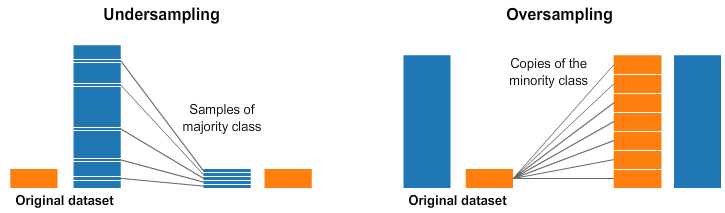

### Random Undersampling

**Randomly removing samples from the majority class to balance the dataset.**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler() #sampling_strategy=1
x_res, y_res = rus.fit_resample(x_train, y_train)

In [ ]:
#before Random undersampling
y_train.value_counts()

In [ ]:
#after Random undersampling
y_res.value_counts()

In [ ]:
#modeling
logreg.fit(x_res, y_res)
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

### Random Oversampling

**Randomly duplicating samples from the minority class to balance the dataset.**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler() #sampling_strategy='minority'
x_ran, y_ran = os.fit_resample(x_train, y_train)

In [ ]:
#before random oversampling
y_train.value_counts()

In [ ]:
#after random oversampling
y_ran.value_counts()

In [ ]:
#modeling
logreg.fit(x_ran, y_ran)
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

### Undersampling using Tomek Links

**Tomek links are pairs of examples of opposite classes in close vicinity.
In this algorithm, we end up removing the majority element from the Tomek link, which provides a better decision boundary for a classifier.**

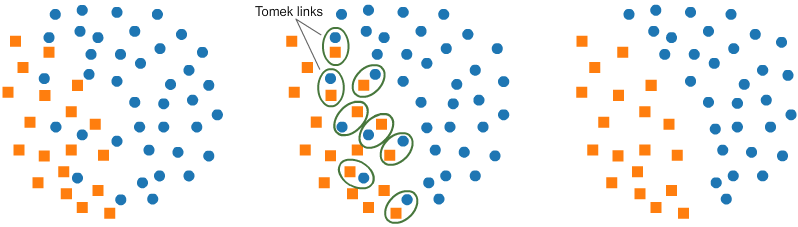

In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
x_res_tl, y_res_tl = tl.fit_resample(x_train, y_train)

In [ ]:
tl.get_params()

In [ ]:
#before random oversampling
y_train.value_counts()

In [ ]:
#after random oversampling
y_res_tl.value_counts()

In [ ]:
#modeling
logreg.fit(x_res_tl, y_res_tl)
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

### Generate Synthetic Samples

**SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.**
**(Synthetic Minority Over-sampling Technique):
Generating synthetic samples for the minority class based on the characteristics of existing samples.**

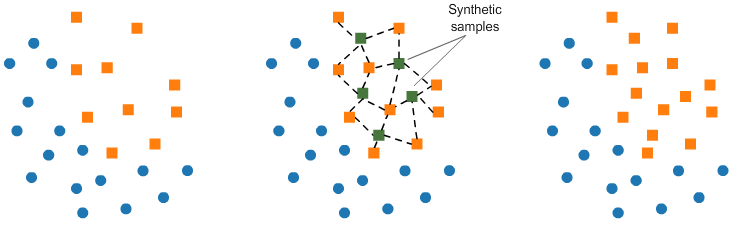

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_res_sm, y_res_sm = sm.fit_resample(x_train, y_train)

In [ ]:
#before random oversampling
y_train.value_counts()

In [ ]:
#after random oversampling
y_res_sm.value_counts()

In [ ]:
#modeling
logreg.fit(x_res_sm, y_res_sm)
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

### SMOTE-ENN

**Over-sampling using SMOTE and cleaning using ENN.
Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.**

In [ ]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN()
x_sme, y_sme = sme.fit_resample(x_train, y_train)

In [ ]:
#before random oversampling
y_train.value_counts()

In [ ]:
#after random oversampling
y_res_sm.value_counts()

In [ ]:
#modeling
logreg.fit(x_sme, y_sme)
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)